In [20]:
# Import necessary libraries
import numpy as np
import librosa, librosa.display #audio processing
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
audio_file = "/content/long-noisy-woosh-6048.mp3"
# get raw audio features
print("Sampling Rate : "+ str(librosa.get_samplerate(audio_file))+"Hz")
print("Duration : "+ str(librosa.get_duration(filename=audio_file))+"s")

# import the audio files
signal, sampling_rate = librosa.load(audio_file, sr=44100, mono=False)
# Shape of features
print("Shape of Initial Data : "+ str(signal.shape))

Sampling Rate : 24000Hz
Duration : 24.648s


<ipython-input-3-7f931bdaef2a>:4: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  print("Duration : "+ str(librosa.get_duration(filename=audio_file))+"s")


Shape of Initial Data : (2, 1086977)


###Audio Channels
The above audio has 2 channels as indicated by (signal.shape). Therefore it is stereophonic. As they are more complex we will convert it to monophonic channel

In [4]:
print(signal.shape)# Initially the signal is in stereo form (2 channels)
audio_mono = librosa.to_mono(signal)
print(audio_mono.shape) # Mono signal

(2, 1086977)
(1086977,)


###Sampling

In [5]:
# Original Sampling Rate is 44 kHz
print("Original Sampling Rate : "+str(sampling_rate)+" Hz")
# Downsample to 22 kHz
signal_22k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=22050)
# Upsample to 88 kHz
signal_88k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=88200)
print(signal_22k.shape)
print(signal_88k.shape)

Original Sampling Rate : 44100 Hz
(543489,)
(2173954,)


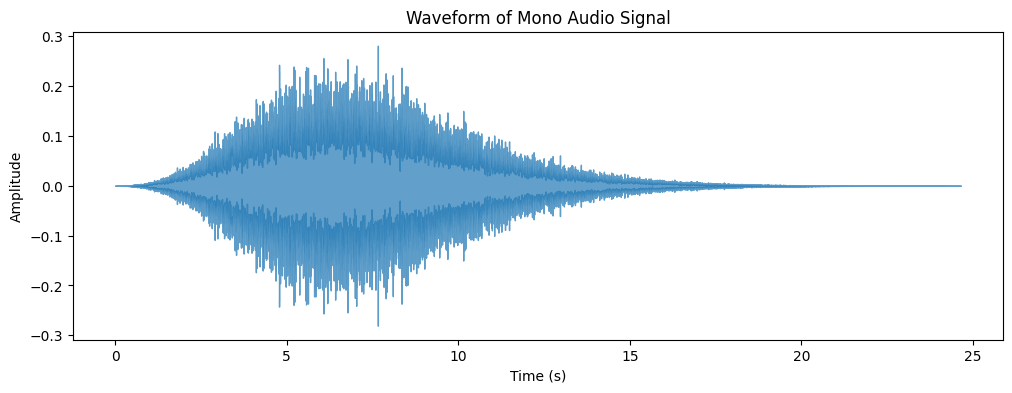

In [7]:
import librosa.display
import matplotlib.pyplot as plt

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_mono, sr=sampling_rate, alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of Mono Audio Signal")
plt.show()


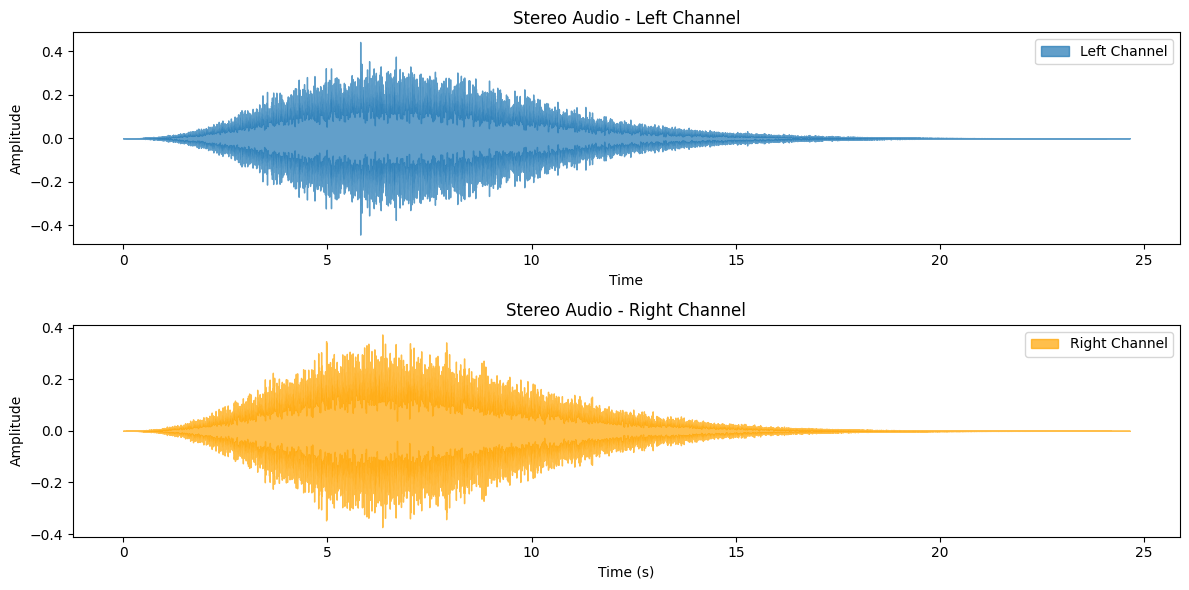

In [9]:
import librosa.display
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 6))

# Plot Left Channel
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal[0], sr=sampling_rate, alpha=0.7, label="Left Channel")
plt.title("Stereo Audio - Left Channel")
plt.ylabel("Amplitude")
plt.legend()

# Plot Right Channel
plt.subplot(2, 1, 2)
librosa.display.waveshow(signal[1], sr=sampling_rate, alpha=0.7, label="Right Channel", color="orange")
plt.title("Stereo Audio - Right Channel")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


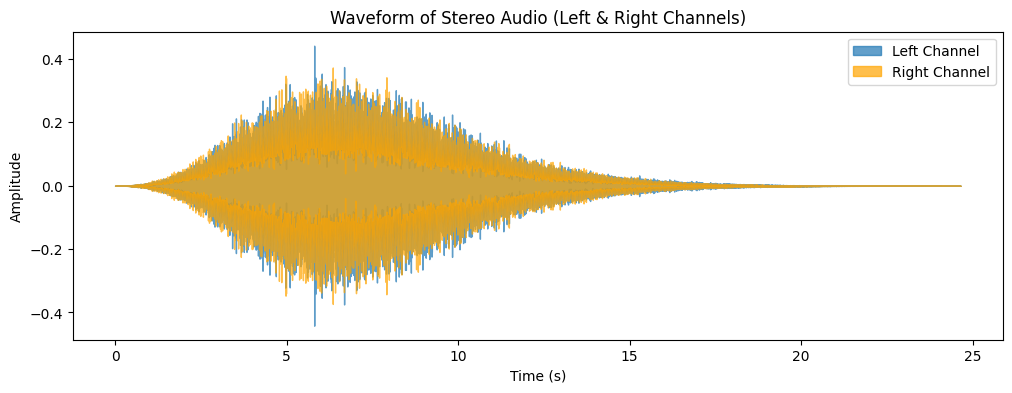

In [11]:


# Create figure
plt.figure(figsize=(12, 4))

# Plot Left Channel (Default: Blue)
librosa.display.waveshow(signal[0], sr=sampling_rate, alpha=0.7, label="Left Channel")

# Plot Right Channel (Orange)
librosa.display.waveshow(signal[1], sr=sampling_rate, alpha=0.7, label="Right Channel", color="orange")

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of Stereo Audio (Left & Right Channels)")
plt.legend()

# Show plot
plt.show()


In [12]:
# Change the sampling and channels
audio, sr = librosa.load(audio_file, sr=22050, mono=True)

###Fast Fourier Transform (FFT) in Python using Librosa & NumPy
The Fast Fourier Transform (FFT) converts a time-domain signal into a frequency-domain representation. This helps analyze the frequency components of the audio signal.



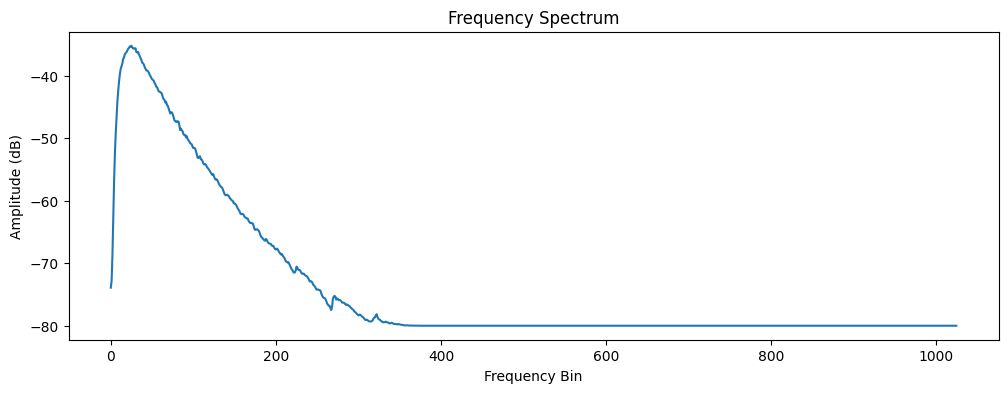

In [17]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Parameters
n_fft = 2048
hop_length = n_fft // 4  # Standard practice

# Compute STFT on the entire audio signal
ft = np.abs(librosa.stft(audio_mono, n_fft=n_fft, hop_length=hop_length))

# Convert to decibels for better visualization
ft_db = librosa.amplitude_to_db(ft, ref=np.max)

# Plot the spectrum (Sum over time axis)
plt.figure(figsize=(12, 4))
plt.plot(np.mean(ft_db, axis=1))  # Take mean over time axis
plt.title('Frequency Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude (dB)')
plt.show()


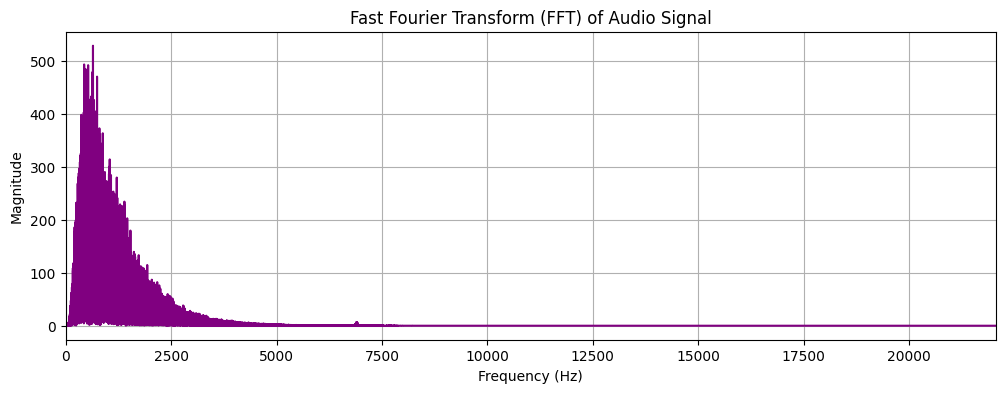

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Compute FFT
fft_spectrum = np.fft.fft(audio_mono)
frequencies = np.fft.fftfreq(len(fft_spectrum), d=1/sampling_rate)

# Keep only the positive half of frequencies
half_spectrum = np.abs(fft_spectrum[:len(fft_spectrum)//2])
half_frequencies = frequencies[:len(frequencies)//2]

# Plot FFT Spectrum
plt.figure(figsize=(12, 4))
plt.plot(half_frequencies, half_spectrum, color='purple')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Fast Fourier Transform (FFT) of Audio Signal")
plt.xlim([0, sampling_rate//2])  # Nyquist Limit
plt.grid()
plt.show()


###Short-Time Fourier Transform
In FFT, we lost information of time when we are converting from time domain to frequency domain representation. As a remedy, Short Time Frequency Transform can be applied.

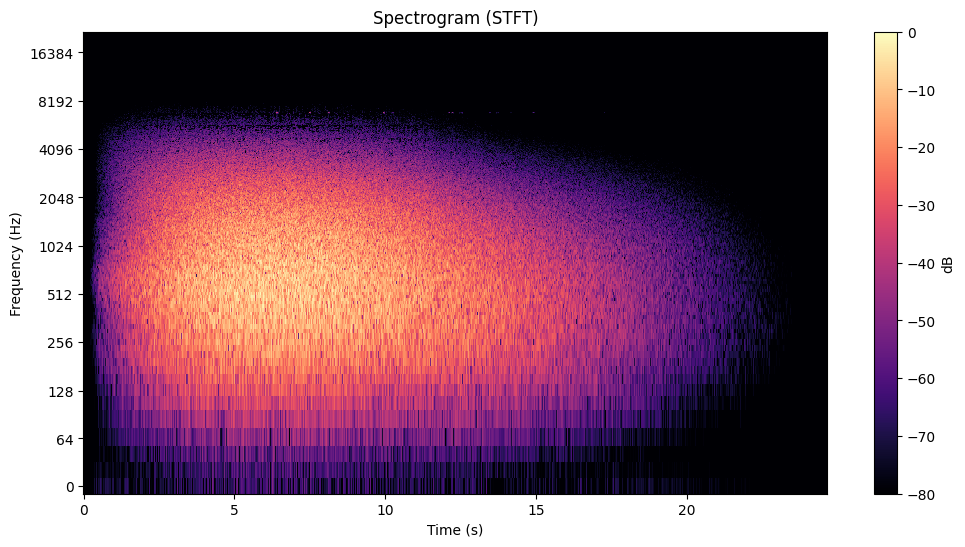

In [19]:
# Parameters
n_fft = 2048  # FFT window size
hop_length = n_fft // 4  # Overlapping window step

# Compute STFT
stft_result = librosa.stft(audio_mono, n_fft=n_fft, hop_length=hop_length)

# Convert to decibels for better visualization
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sampling_rate, hop_length=hop_length, x_axis="time", y_axis="log")
plt.colorbar(label="dB")
plt.title("Spectrogram (STFT)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


###Mel Spectrogram
The Mel Spectrogram is a representation of the audio that uses the Mel scale, which approximates how humans perceive pitch. It compresses the frequency axis to match human hearing and is often used in tasks like speech recognition and music analysis.

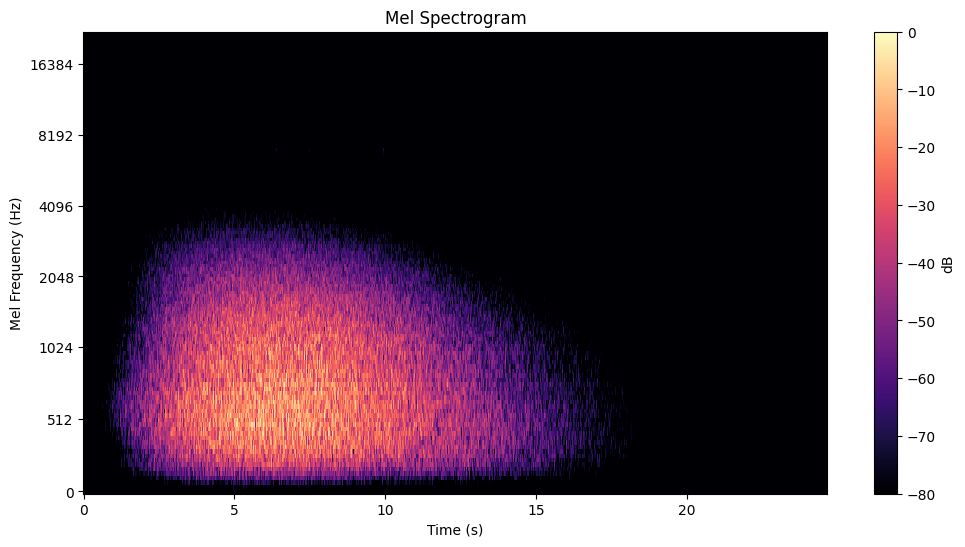

In [22]:
# Parameters
n_fft = 2048  # FFT window size
hop_length = n_fft // 4  # Overlapping window step
n_mels = 128  # Number of Mel bands

# Compute Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_mono, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

# Convert to decibels for better visualization
mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)

# Plot Mel Spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sampling_rate, hop_length=hop_length, x_axis="time", y_axis="mel")
plt.colorbar(label="dB")
plt.title("Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency (Hz)")
plt.show()



### Mel-Frequency Cepstral Coefficients (MFCC)
MFCCs are widely used features in audio processing, especially in speech recognition, as they capture the power spectrum of the sound. They are computed by taking the logarithm of the Mel spectrogram and applying a discrete cosine transform (DCT) to the result.



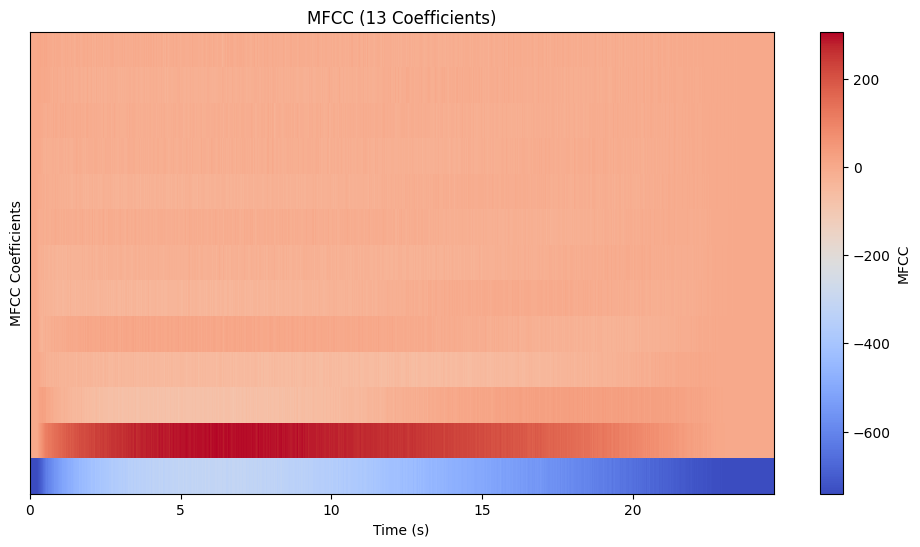

In [23]:
# Parameters
n_fft = 2048  # FFT window size
hop_length = n_fft // 4  # Overlapping window step
n_mels = 128  # Number of Mel bands
n_mfcc = 13  # Number of MFCCs to extract

# Compute MFCC
mfccs = librosa.feature.mfcc(y=audio_mono, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc, n_mels=n_mels)

# Plot MFCC
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sampling_rate, hop_length=hop_length)
plt.colorbar(label='MFCC')
plt.title(f'MFCC ({n_mfcc} Coefficients)')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


### **Conclusion**

In this notebook, we have explored the fundamental steps involved in **audio preprocessing** using Python and libraries like **Librosa**. The key objectives and techniques covered include:

1. **Audio Loading and Preprocessing**:
   - We loaded audio files into Python using **Librosa** and ensured proper handling of **mono** and **stereo** formats.
   - We explored techniques like **downsampling** and **upsampling** to adjust the audio sample rate to appropriate levels for analysis.

2. **Feature Extraction**:
   - We demonstrated various feature extraction techniques, such as:
     - **Waveform Visualization**: We visualized both **mono** and **stereo** waveforms, gaining insight into the amplitude of sound over time.
     - **Spectrograms**: We explored the frequency content of the audio using **STFT (Short-Time Fourier Transform)**, and examined the energy distribution across both frequency and time.
     - **Mel Spectrogram**: Using the **Mel scale**, we visualized the audio's frequency content in a way that mimics human hearing, which is commonly used for speech and music analysis.
     - **MFCCs (Mel-Frequency Cepstral Coefficients)**: We extracted and visualized **MFCCs**, which are powerful features for audio classification and speech recognition tasks.

This notebook provides a robust introduction to audio data preprocessing, with practical examples of feature extraction and visualization. These techniques will be useful in real-world projects that involve audio analysis, and can serve as a stepping stone to more advanced applications in the field of **audio signal processing** and **machine learning**.
